In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(repr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
cols_ <- c("leaid", "leaname","fips", "stateabb", "ses", "meangs", "mnenrol", "top100")
df <- read_csv("data/SEDA_DistrictData_toconvertforR.csv", 
    col_names = cols_)

Parsed with column specification:
cols(
  leaid = col_double(),
  leaname = col_character(),
  fips = col_double(),
  stateabb = col_character(),
  ses = col_double(),
  meangs = col_double(),
  mnenrol = col_double(),
  top100 = col_double()
)


# Problem Set 1, PP240B
## Peter Amerkhanian

## Question 8
## (i)
How do you think the average student in your elementary school or district compared to the national average on math and reading tests?  
Were they 1 grade level above average? 1 grade level below average? **Find out specifically by looking for your district (“leaname”) and its achievement in comparison to the national average**   
note, the standardized outcome measure (“meangs”) has already been converted to grade-level equivalents (e.g., 0 represents the national average; 1 represents 1 grade level above average; -1 represents 1 grade level below average).

In [3]:
df_alb <- filter(df, leaname == "Albany City Unified")
cat(sprintf("% s is % s grade levels above average", df_alb$leaname, df_alb$meangs))

Albany City Unified is 2 grade levels above average

## (ii)
**What are the mean, median, 10th, 25th, 75th, and 90th percentile of academic achievement? (1)**  
[Hint: use the sum command with the detail option (options come at the end of a Stata command, following a comma). For help, search on “summarize” in the Stata help menus.] **How many public school districts are there in the US? (2)** Did you **take into account the district’s student enrollment size (“mnenrol”) in the calculation of the distribution of academic achievement above? [hint: if not, go back & do so] (3)**

**1) What are the mean, median, 10th, 25th, 75th, and 90th percentile of academic achievement?**

In [4]:
cat("\nMean: ")
cat(mean(df$meangs))
cat("\nMedian: ")
cat(median(df$meangs))
cat("\n")
for (val in list(0.1, 0.25, 0.75, 0.9)) cat(format(val), "percentile:", paste(quantile(df$meangs, val), "\n"))


Mean: 0.08507937
Median: 0
0.1 percentile: -1 
0.25 percentile: -1 
0.75 percentile: 1 
0.9 percentile: 1 


In [5]:
summary(df$meangs)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-7.00000 -1.00000  0.00000  0.08508  1.00000  4.00000 

In [6]:
# scale visuals
options(repr.plot.width=4, repr.plot.height=3)

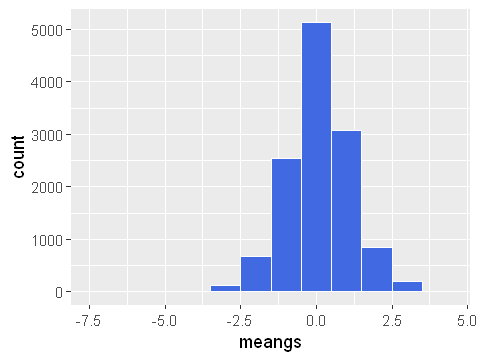

In [7]:
ggplot(df, aes(x=meangs)) + geom_histogram(binwidth=1, colour="white", fill="royalblue")

**2) How many public school districts are there in the US?**

In [9]:
cat(sprintf("There are % s districts", formatC(length(unique(df$leaname)), format="f", big.mark=",", digits=0)))

There are 12,209 districts

**3) What are the mean, median, 10th, 25th, 75th, and 90th percentile of academic achievement - adjusted for enrollment**

In [10]:
summary_df <- dplyr::count(df, meangs, sort = TRUE)
students_vector = c()
for (val in summary_df$meangs)
    {
    grade_level <- val
    num_of_students_at_grade_level = sum(filter(df, meangs == val)$mnenrol)
    o <- sprintf("Students in schools at %d levels: %s", grade_level, num_of_students_at_grade_level)
    cat(o, "\n")
    # A vector where elements are a given grade level n times (n=students in schools at that grade level)
    column <- rep(c(grade_level), num_of_students_at_grade_level)
    # A vector where every student is represented by the grades-above-average their school is
    students_vector <- c(students_vector, column)
}
cat("\n")
cat("mean: ")
cat(mean(students_vector), "\n")
cat("median: ")
cat(median(students_vector), "\n")
for (val in list(0.1, 0.25, 0.75, 0.9)) cat(format(val), "percentile:", paste(quantile(students_vector, val,), "\n"))

Students in schools at 0 levels: 1359413 
Students in schools at 1 levels: 826510 
Students in schools at -1 levels: 865429 
Students in schools at 2 levels: 249510 
Students in schools at -2 levels: 268268 
Students in schools at 3 levels: 49258 
Students in schools at -3 levels: 18424 
Students in schools at -4 levels: 787 
Students in schools at 4 levels: 2115 
Students in schools at -7 levels: 31 
Students in schools at -5 levels: 35 

mean: 0.005766008 
median: 0 
0.1 percentile: -1 
0.25 percentile: -1 
0.75 percentile: 1 
0.9 percentile: 1 


In [11]:
summary(students_vector)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-7.000000 -1.000000  0.000000  0.005766  1.000000  4.000000 

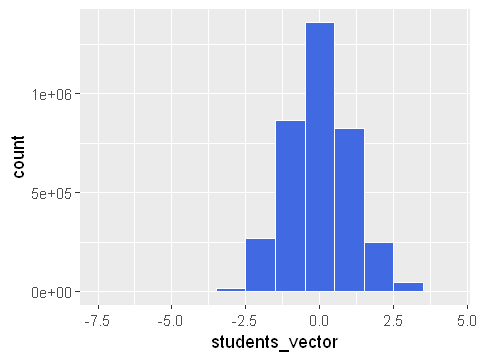

In [12]:
ggplot() + aes(students_vector) + geom_histogram(binwidth=1, colour="white", fill="royalblue")

## (iii)

In [13]:
socio_econ_df <- read_csv("data/small SEDA v30 district data for example code.csv", 
    col_names = TRUE)

Parsed with column specification:
cols(
  leaid = col_double(),
  leaname = col_character(),
  fips = col_double(),
  stateabb = col_character(),
  ses = col_double(),
  meangs = col_double(),
  mnenrol = col_double(),
  top100 = col_double()
)


In [14]:
cat("Correlation coefficeint: ", cor(socio_econ_df$meangs, socio_econ_df$ses))

Correlation coefficeint:  0.7679985

## (iv)

In [21]:
# scale visuals
options(repr.plot.width=6, repr.plot.height=6)

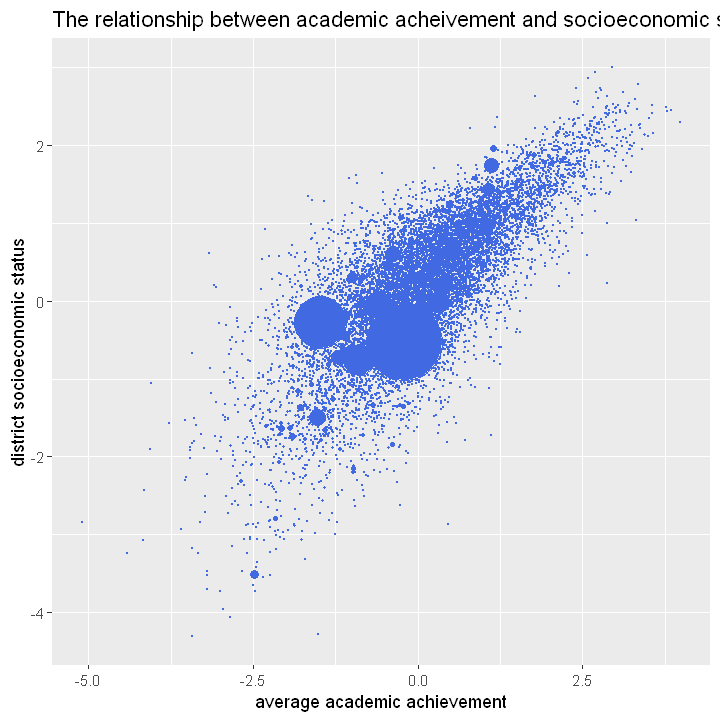

In [22]:
ggplot(socio_econ_df, aes(x=meangs, y=ses)) +
geom_point(colour="royalblue", size=socio_econ_df$mnenrol*.0003) +
xlab("average academic achievement") + ylab("district socioeconomic status") + 
ggtitle("average academic achievement/district socioeconomic status")